<h1 style="color:red;font-family:cursive;text-align:left;font-weight:500;">M Talal Iftikhar</h1>
<h1 style="color:red;font-family:cursive;text-align:left;font-weight:500;">2022-ag-8570</h1>

<h1 style="color:blue;font-family:cursive;text-align:center;font-weight:bold;"> Importing Libraries</h1>

In [3]:
# importing pandas library
import pandas as pd
# import numpy library
import numpy as np
# import LaebelEncoder and StandardScaler from sklearn
from sklearn.preprocessing import LabelEncoder,StandardScaler
# import seaborn
import seaborn as sns
# import matplotlib for plotting graphs and heatmaps
import matplotlib.pyplot as plt
# import PCA 
from sklearn.decomposition import PCA
# import train_test_split module from sklearn
from sklearn.model_selection import train_test_split
# import metrics from sklearn
from sklearn import metrics
# import mean absolute error,mse and r squared
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# import linear regression
from sklearn.linear_model import LinearRegression
# import SVR from SVM
from sklearn.svm import SVR
# import Decison tree regressor
from sklearn.tree import DecisionTreeRegressor
# import the random forest regressor
from sklearn.ensemble import RandomForestRegressor
# imporitng a utility from sklearn to plot decison tree
from sklearn.tree import plot_tree
# import the Sequential module from tensorflow
from tensorflow.keras.models import Sequential
# impoert Dense and input from tensorflow
from tensorflow.keras.layers import Dense,Input

<h1 style="color:blue;font-family:cursive;text-align:center;font-weight:bold;"> Pre-processing</h1>

### Load data into pandas

In [6]:
# read and load the dataset
df=pd.read_csv("avocado.csv")
# print information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


### Finding null values in the data

In [8]:
# Find null values 
df.isna()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# find null vlaues in columns
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
# find total null values
df.isna().sum().sum()

0

### Convert categorical columns into numerical columns


In [12]:
# create an object for label encoder
le=LabelEncoder()
# convert the categorical values into numerical values in Date column
df["Date"]=le.fit_transform(df["Date"])
# convert the categorical values into numerical values in type column
df["type"]=le.fit_transform(df["type"])
# convert the categorical values into numerical values in region column
df["region"]=le.fit_transform(df["region"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  int32  
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  int32  
 12  year          18249 non-null  int64  
 13  region        18249 non-null  int32  
dtypes: float64(9), int32(3), int64(2)
memory usage: 1.7 MB


### Change the name of columns for ease

In [14]:
#changing 4046 to Small_sized
df.rename(columns = {'4046': 'Small_sized'}, inplace=True)
#chainging 4225 to Medium_sized
df.rename(columns = {'4225': 'Medium_sized'}, inplace=True)
#chainging 4770 to Large_sized
df.rename(columns = {'4770': 'Large_sized'}, inplace=True)
# printing information after replacing names of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  int32  
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   Small_sized   18249 non-null  float64
 5   Medium_sized  18249 non-null  float64
 6   Large_sized   18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  int32  
 12  year          18249 non-null  int64  
 13  region        18249 non-null  int32  
dtypes: float64(9), int32(3), int64(2)
memory usage: 1.7 MB


### Finding correlation before dropping columns

In [16]:
# create an object for correlation
correlation=df.corr()
# print correlation
correlation

,Unnamed: 0,Date,AveragePrice,Total Volume,Small_sized,Medium_sized,Large_sized,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.419926,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.000288,-0.171667,-0.000489
Date,-0.419926,1.000000,0.145514,0.009263,-0.005028,-0.016895,-0.047517,0.064688,0.056902,0.081855,0.077374,-0.000060,0.950274,-0.000101
AveragePrice,-0.133008,0.145514,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,0.014035,0.009263,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
Small_sized,0.017628,-0.005028,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
Medium_sized,0.019829,-0.016895,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
Large_sized,0.041752,-0.047517,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.002219,0.064688,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,0.000347,0.056902,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.009196,0.081855,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768


#### Heatmap before correlation

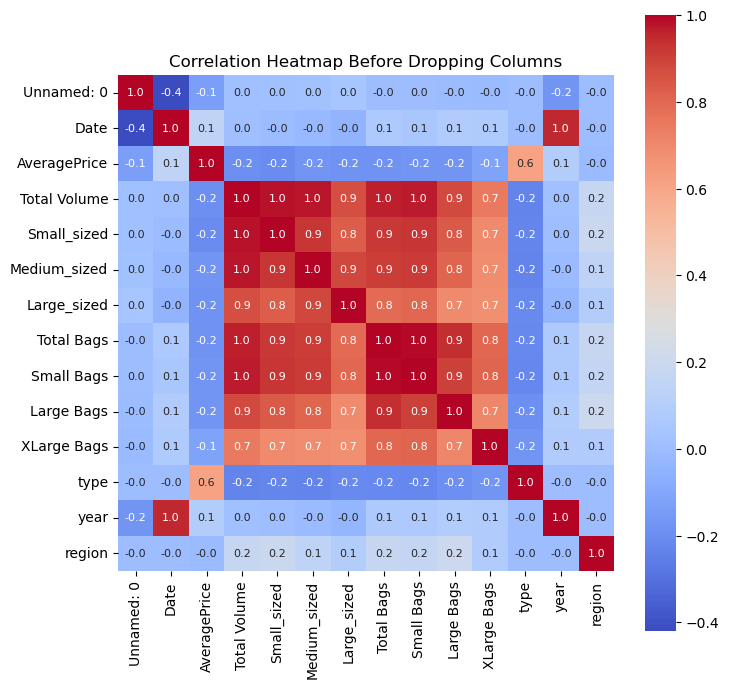

In [18]:
# specify the figure size
plt.figure(figsize=(8,8))
# properties of heatmap
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='coolwarm')
# specify the title of heatmap
plt.title("Correlation Heatmap Before Dropping Columns")
# show the heatmap
plt.show()

### Dropping columns identified from heatmap

In [20]:
# drop columns
df=df.drop(["Unnamed: 0","region"],axis=1)
# print information after dropping columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   Small_sized   18249 non-null  float64
 4   Medium_sized  18249 non-null  float64
 5   Large_sized   18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  int32  
 11  year          18249 non-null  int64  
dtypes: float64(9), int32(2), int64(1)
memory usage: 1.5 MB


### Correlation after dropping columns

In [22]:
# find correlation after dropping columns
correlation=df.corr()
# print correlation
correlation

,Date,AveragePrice,Total Volume,Small_sized,Medium_sized,Large_sized,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
Date,1.000000,0.145514,0.009263,-0.005028,-0.016895,-0.047517,0.064688,0.056902,0.081855,0.077374,-0.000060,0.950274
AveragePrice,0.145514,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197
Total Volume,0.009263,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193
Small_sized,-0.005028,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353
Medium_sized,-0.016895,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559
Large_sized,-0.047517,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531
Total Bags,0.064688,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552
Small Bags,0.056902,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915
Large Bags,0.081855,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891
XLarge Bags,0.077374,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033


#### Heatmap after dropping columns

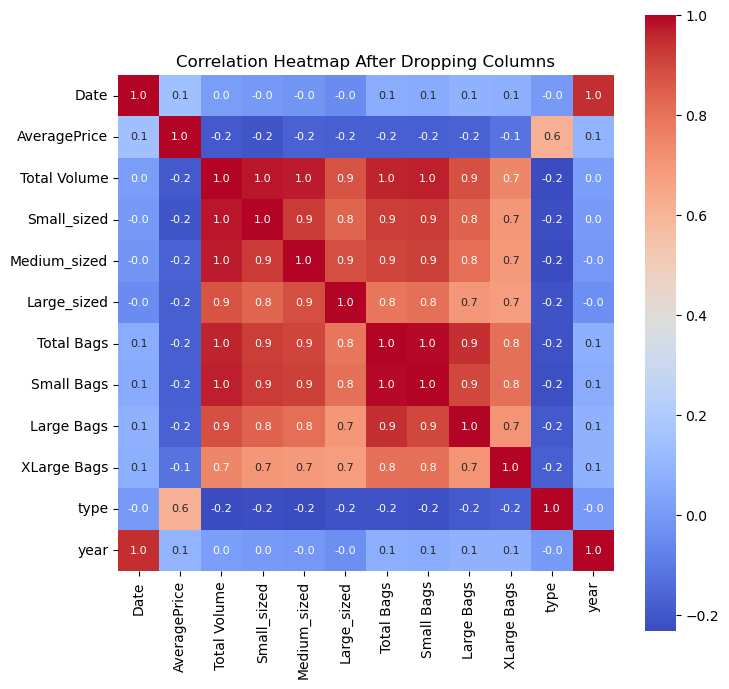

In [24]:
# specify the figure size
plt.figure(figsize=(8,8))
# plot the heatmap
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='coolwarm')
# specify the title of heatmap
plt.title("Correlation Heatmap After Dropping Columns")
# show the heatmao
plt.show()

## Data Splitting

In [26]:
# store featurs in X
X=df.drop(["AveragePrice"],axis=1)
# store class in Y
Y=df["AveragePrice"]
# print X
X

,Date,Total Volume,Small_sized,Medium_sized,Large_sized,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,51,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015
1,50,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015
2,49,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015
3,48,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015
4,47,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015
...,...,...,...,...,...,...,...,...,...,...,...
18244,161,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018
18245,160,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018
18246,159,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018
18247,158,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018


In [27]:
# print Y
Y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

## Standardization of Data

In [29]:
# create an object of standard scaler and scale the data
scaler=StandardScaler()
# store the scaled data in x_scaled
X_scaled=scaler.fit_transform(X)
# print 1st row of scaled data
X_scaled[:1]

array([[-0.67635986, -0.22771641, -0.23081597, -0.1999022 , -0.21209136,
        -0.23417028, -0.2326465 , -0.22235202, -0.17557961, -0.99983562,
        -1.22128204]])

## Apply PCA

In [31]:
# create an object of PCA
pca=PCA(n_components=7)
# store the data in x_pca
X_pca=pca.fit_transform(X_scaled)
# print the shape of data after applying pca
X_pca.shape

(18249, 7)

## Train test and split the data

In [33]:
# specify the training and testing sizes
X_TRAIN,X_TEST,Y_TRAIN,Y_TEST=train_test_split(X_pca,Y,test_size=0.20,random_state=20)
# printing the size of Train X
print("Size of Train X =",len(X_TRAIN))
# printing the size of Train Y
print("Size of Train Y =",len(Y_TRAIN))
# printing the size of Test X
print("Size of Test X =",len(X_TEST))
# printing the size of Test Y
print("Size of Test Y =",len(Y_TEST))

Size of Train X = 14599
Size of Train Y = 14599
Size of Test X = 3650
Size of Test Y = 3650


<h1 style="color:blue;font-family:cursive;text-align:center;font-weight:bold;"> Training the Models after applying PCA</h1>

<h1 style="color:green;font-family:cursive;text-align:center;font-weight:bold;"> Linear Regression</h1>

In [36]:
# create an object for linear regression
linear_regressor=LinearRegression()
# train the model for linear regression
linear_regressor.fit(X_TRAIN,Y_TRAIN)

LinearRegression()

### Prediction on training data

In [38]:
# make predictions on training data
training_data_prediction=linear_regressor.predict(X_TRAIN)
# print the predicted values
print(training_data_prediction)

[1.65527522 1.16566259 1.26464857 ... 1.63564484 1.47099724 1.70098191]


In [39]:
# calculate the r2 score of training data
score_1=metrics.r2_score(Y_TRAIN,training_data_prediction)
# claculate the mean absolute error for training data
score_2=metrics.mean_absolute_error(Y_TRAIN,training_data_prediction)
# print r2 score on training data
print("Training R Squared : ",score_1)
# print mae on training data
print("Training Mean Absolute Error : ",score_2)

Training R Squared :  0.4062990842056926
Training Mean Absolute Error :  0.23715856736535668


#### Graph betweeen actual and predicted prices in training data

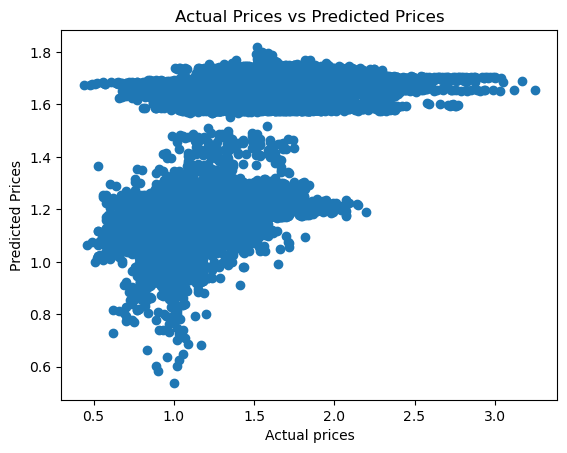

In [41]:
# plotting the graph between actual and predicted values
plt.scatter(Y_TRAIN,training_data_prediction)
# specifying the x label as actual prices
plt.xlabel("Actual prices")
# specifying the y label as predicted prices
plt.ylabel("Predicted Prices")
# giving the title as actual vs predicted prices
plt.title("Actual Prices vs Predicted Prices")
# dsipplay the graph
plt.show()

### Prediction on Testing data

In [43]:
# make predictions on testing data
y_pred=linear_regressor.predict(X_TEST)
# print predicted values
print(y_pred)

[1.65995453 1.63697063 1.11906293 ... 1.59396826 1.21830459 1.3294616 ]


In [44]:
# calculate r2 score for testing data
score_1=metrics.r2_score(Y_TEST,y_pred)
# calculate mae for testing data
score_2=metrics.mean_absolute_error(Y_TEST,y_pred)
# print r2 score
print("Training R Sqaured : ",score_1)
#print mae on testing data
print("Testing Mean Absolute Error : ",score_2)

Training R Sqaured :  0.4354641719034724
Testing Mean Absolute Error :  0.23432851152391795


#### Graph between actual and predicted prices in test data

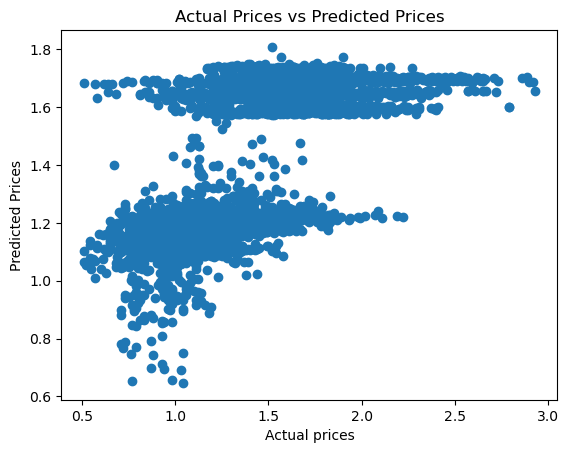

In [46]:
# plotting the graph between actual test samples and predicted test samples
plt.scatter(Y_TEST,y_pred)
# specify x label as actual prices
plt.xlabel("Actual prices")
# specify y label as predicted prices
plt.ylabel("Predicted Prices")
# specifying the title as actual vs predicted prices
plt.title("Actual Prices vs Predicted Prices")
# displaying the graph
plt.show()

<h1 style="color:green;font-family:cursive;text-align:center;font-weight:bold;"> SVR</h1>

In [48]:
# create an object for SVR
svr=SVR(kernel='linear')
# train the model on svr
svr.fit(X_TRAIN,Y_TRAIN)

SVR(kernel='linear')

### Predictions on training data

In [50]:
# make predictions on training data
training_data_prediction=svr.predict(X_TRAIN)
# print predicted values
print(training_data_prediction)

[1.63457453 1.15212424 1.24009313 ... 1.61820871 1.45503572 1.67134318]


In [51]:
# calculate the r2 score of training data
score_1=metrics.r2_score(Y_TRAIN,training_data_prediction)
# claculate the mean absolute error for training data
score_2=metrics.mean_absolute_error(Y_TRAIN,training_data_prediction)
# print r2 score on training data
print("Training R Squared : ",score_1)
# print mae on training data
print("Training Mean Absolute Error : ",score_2)

Training R Squared :  0.40388936562111355
Training Mean Absolute Error :  0.23645693875006688


#### Graph between actual and predicted prices 

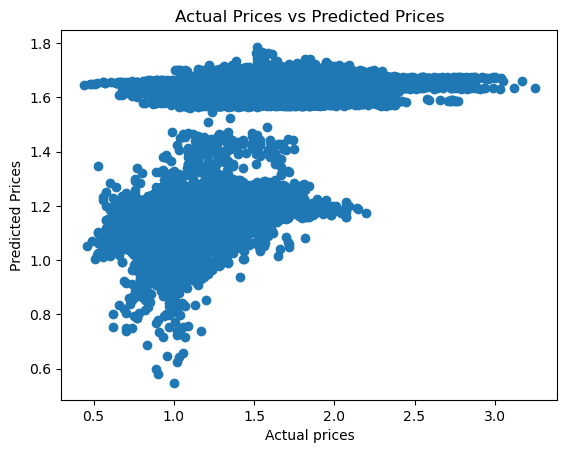

In [53]:
# plotting the graph between actual and predicted values
plt.scatter(Y_TRAIN,training_data_prediction)
# specifying the x label as actual prices
plt.xlabel("Actual prices")
# specifying the y label as predicted prices
plt.ylabel("Predicted Prices")
# giving the title as actual vs predicted prices
plt.title("Actual Prices vs Predicted Prices")
# dsipplay the graph
plt.show()

### Predictions on test data

In [55]:
# make predictions on testng data
y_pred=svr.predict(X_TEST)
# print predicted values
print(y_pred)

[1.63909621 1.6191617  1.11718723 ... 1.58501352 1.19770821 1.31324744]


In [56]:
# calculate r2 for testing data
score_1=metrics.r2_score(Y_TEST,y_pred)
# calculate mae for testing data
score_2=metrics.mean_absolute_error(Y_TEST,y_pred)
# print r2 score
print("Testing R Squared : ",score_1)
# print mae
print("Testing Mean Absolute Error : ",score_2)

Testing R Squared :  0.43194049946538093
Testing Mean Absolute Error :  0.23371241938399645


#### Graph between actual and predicted average price

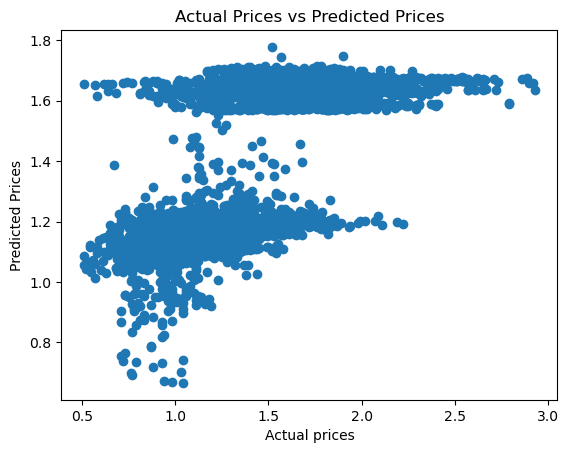

In [58]:
# plotting the graph between actual test samples and predicted test samples
plt.scatter(Y_TEST,y_pred)
# specify x label as actual prices
plt.xlabel("Actual prices")
# specify y label as predicted prices
plt.ylabel("Predicted Prices")
# specifying the title as actual vs predicted prices
plt.title("Actual Prices vs Predicted Prices")
# displaying the graph
plt.show()

<h1 style="color:green;font-family:cursive;text-align:center;font-weight:bold;"> Decision Tree</h1>

In [60]:
# create an object for decision tree regressor
dt_regressor=DecisionTreeRegressor(random_state=20)
# train model on decision tree regressor
dt_regressor.fit(X_TRAIN,Y_TRAIN)

DecisionTreeRegressor(random_state=20)

### Prediction on training data

In [62]:
# make predictions on training data
training_data_prediction=dt_regressor.predict(X_TRAIN)
# print the predicted values
print(training_data_prediction)

[1.66 1.36 1.65 ... 1.47 1.07 1.39]


In [63]:
# calculate the r2 score of training data
score_1=metrics.r2_score(Y_TRAIN,training_data_prediction)
# claculate the mean absolute error for training data
score_2=metrics.mean_absolute_error(Y_TRAIN,training_data_prediction)
# print r2 score on training data
print("Training R Squared : ",score_1)
# print mae on training data
print("Training Mean Absolute Error : ",score_2)

Training R Squared :  1.0
Training Mean Absolute Error :  6.844309351069531e-19


#### Graph between predicted and actual prices

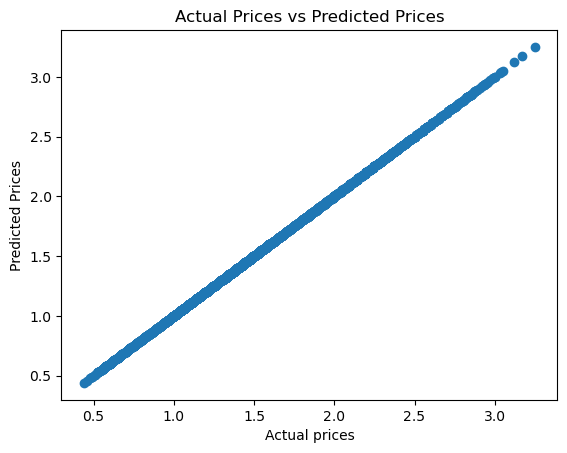

In [65]:
# plot a graph between actual and predicted training samples
plt.scatter(Y_TRAIN,training_data_prediction)
# specifying the x label as actual prices
plt.xlabel("Actual prices")
# specifying the y label as predicted prices
plt.ylabel("Predicted Prices")
# giving the title as actual vs predicted prices
plt.title("Actual Prices vs Predicted Prices")
# dsipplay the graph
plt.show()

### Predictions on test data

In [67]:
# make predictions on testing data
y_pred=dt_regressor.predict(X_TEST)
# print the predicted samples
print(y_pred)

[1.67 1.71 1.3  ... 1.65 1.39 0.88]


In [68]:
# claculate the r2 acore for testing data
score_1=metrics.r2_score(Y_TEST,y_pred)
# calculate the mae for testing data
score_2=metrics.mean_absolute_error(Y_TEST,y_pred)
# print r2 score
print("Testing R Squared : ",score_1)
# print mae
print("Testing Mean Absolute Error : ",score_2)

Testing R Squared :  0.6079111566577198
Testing Mean Absolute Error :  0.16837808219178083


#### Graph between actual and predicted prices

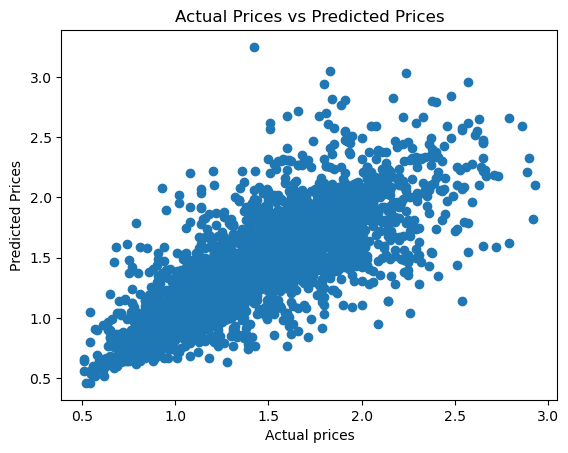

In [70]:
# plotting the graph between actual test samples and predicted test samples
plt.scatter(Y_TEST,y_pred)
# specify x label as actual prices
plt.xlabel("Actual prices")
# specify y label as predicted prices
plt.ylabel("Predicted Prices")
# specifying the title as actual vs predicted prices
plt.title("Actual Prices vs Predicted Prices")
# displaying the graph
plt.show()

<h1 style="color:green;font-family:cursive;text-align:center;font-weight:bold;"> Random Forest</h1>

In [72]:
# create an object for random forest regressor
rf_regressor=RandomForestRegressor(n_estimators=20,random_state=20)
# train the model on random forest regressor
rf_regressor.fit(X_TRAIN,Y_TRAIN)

RandomForestRegressor(n_estimators=20, random_state=20)

### Predictions on Training data

In [74]:
# make predictions on training data
training_data_prediction=rf_regressor.predict(X_TRAIN)
# print the predicted samples
print(training_data_prediction)

[1.7145 1.2885 1.6465 ... 1.5015 1.0975 1.526 ]


In [75]:
# calculate the r2 score of training data
score_1=metrics.r2_score(Y_TRAIN,training_data_prediction)
# claculate the mean absolute error for training data
score_2=metrics.mean_absolute_error(Y_TRAIN,training_data_prediction)
# print r2 score on training data
print("Training R Squared : ",score_1)
# print mae on training data
print("Training Mean Absolute Error : ",score_2)

Training R Squared :  0.9656859197901072
Training Mean Absolute Error :  0.050185046921021985


#### Graph between actual and predicted prices

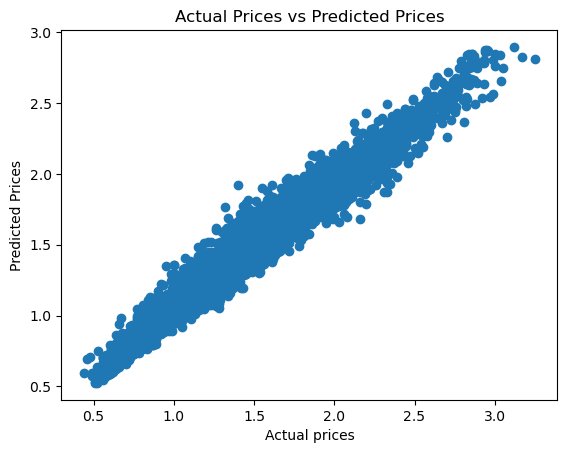

In [77]:
# plotting the graph between actual and predicted values
plt.scatter(Y_TRAIN,training_data_prediction)
# specifying the x label as actual prices
plt.xlabel("Actual prices")
# specifying the y label as predicted prices
plt.ylabel("Predicted Prices")
# giving the title as actual vs predicted prices
plt.title("Actual Prices vs Predicted Prices")
# dsipplay the graph
plt.show()

### Predictions on Testing data

In [79]:
# make predictions on test data
y_pred=rf_regressor.predict(X_TEST)
# print the predicted values
print(y_pred)

[1.754  1.4695 1.221  ... 1.9445 1.4195 0.8745]


In [80]:
# calculate the r2 score for testing data
score_1=metrics.r2_score(Y_TEST,y_pred)
# calculate the mae for testing data
score_2=metrics.mean_absolute_error(Y_TEST,y_pred)
# print the r2 score
print("Testing R Squared : ",score_1)
# print mae
print("Testing Mean Absolute Error : ",score_2)

Testing R Squared :  0.8017736091253951
Testing Mean Absolute Error :  0.1271501369863014


#### Graph between actual and predicted prices

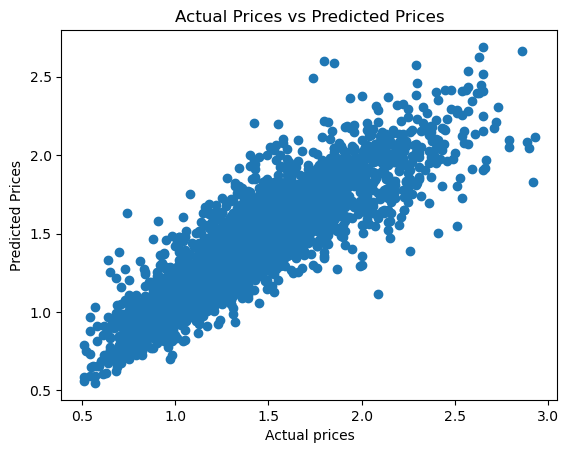

In [82]:
# plotting the graph between actual test samples and predicted test samples
plt.scatter(Y_TEST,y_pred)
# specify x label as actual prices
plt.xlabel("Actual prices")
# specify y label as predicted prices
plt.ylabel("Predicted Prices")
# specifying the title as actual vs predicted prices
plt.title("Actual Prices vs Predicted Prices")
# displaying the graph
plt.show()

<h1 style="color:green;font-family:cursive;text-align:center;font-weight:bold;"> Descision Tree From Random Forest</h1>

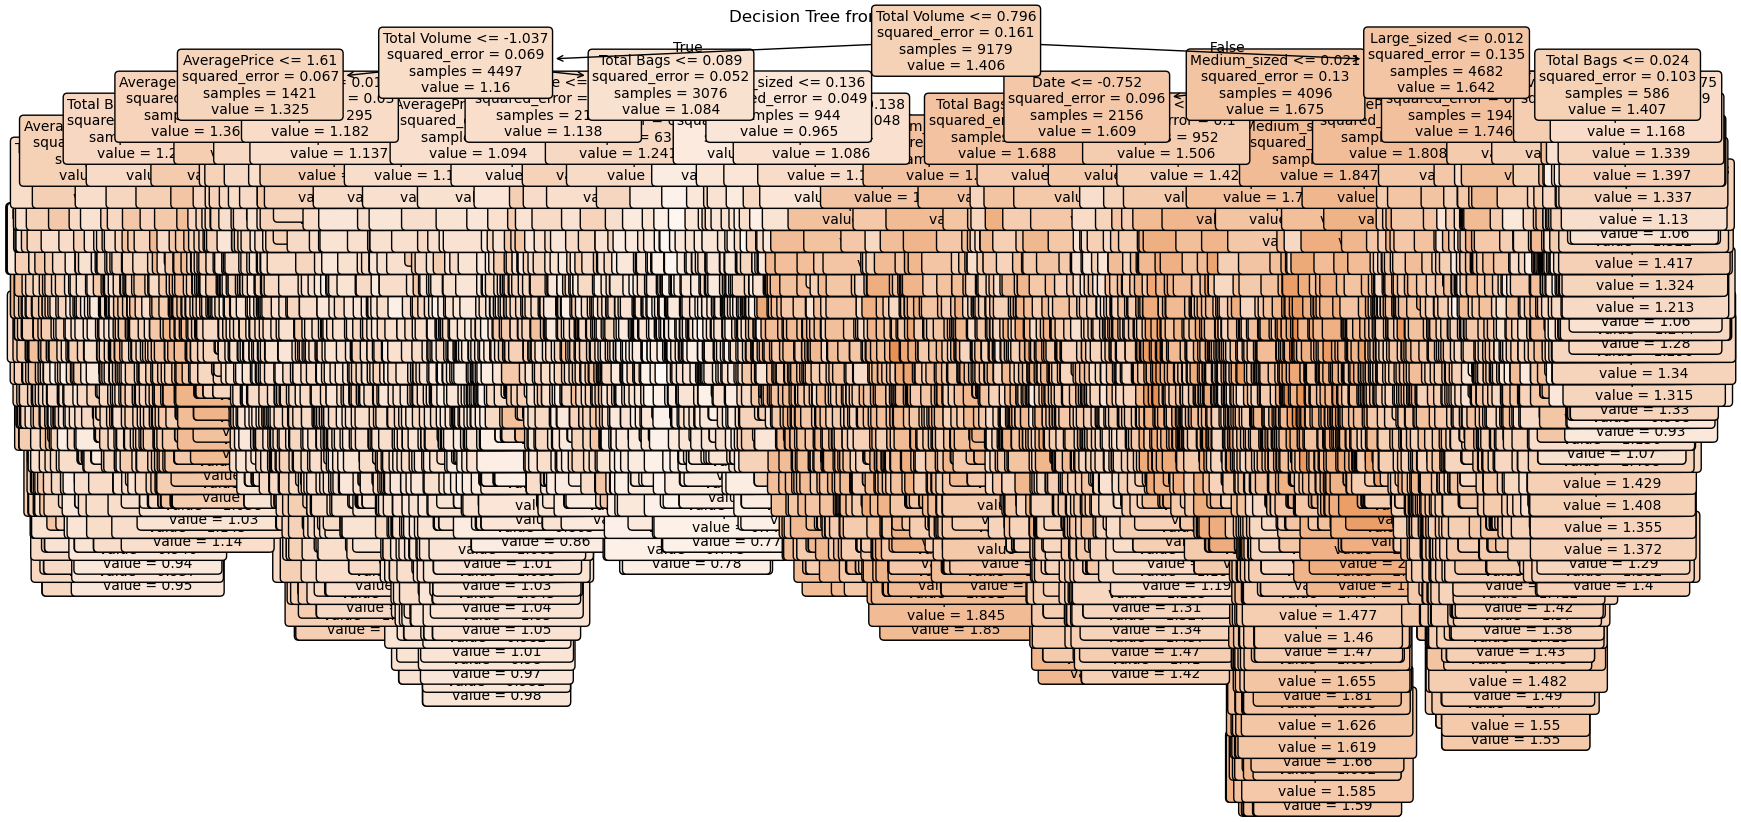

In [84]:
# selecting a single decison tree from the trained RandomForestregressor
tree_to_plot=rf_regressor.estimators_[0]
# creating a figure with width=20 and height=10
plt.figure(figsize=(20,10))
# plotting the decison tree
plot_tree(tree_to_plot,feature_names=df.columns.tolist(),filled=True,rounded=True,fontsize=10)
# specifying the title as Decison Tree from random forest
plt.title("Decision Tree from Random forest")
# plotting the tree
plt.show()

<h1 style="color:green;font-family:cursive;text-align:center;font-weight:bold;"> Neural Network</h1>

## Train the model

In [87]:
# Define the neural network
# using Sequential model in  our neural network
nn_regressor=Sequential([
    # creating the input layer with features in the X_TRAIN
    Input(shape=(X_TRAIN.shape[1],)),
    # 1st hidden layer with 64 neurons and relu as activationn function
    Dense(64,activation='relu'),
    # 2nd hidden layer with 32 neurons and relu as activation function
    Dense(32,activation='relu'),
    # 1 output layaer with linear activation function
    Dense(1,activation='linear')
])
# display the summary of neural network
nn_regressor.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

In [89]:
# compile the model
# optimizer adam is used to adjust the weights after every epoch
nn_regressor.compile(optimizer='adam',
                     # mean squared error to calculate erroe
loss='mean_squared_error',
                     # additional metrics for loss
metrics=['mae'])
nn_regressor.fit(X_TRAIN, Y_TRAIN, epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
365/365 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6196 - mae: 0.5750 - val_loss: 0.0960 - val_mae: 0.2345
Epoch 2/40
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0918 - mae: 0.2296 - val_loss: 0.0870 - val_mae: 0.2202
Epoch 3/40
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0851 - mae: 0.2205 - val_loss: 0.0834 - val_mae: 0.2149
Epoch 4/40
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0812 - mae: 0.2142 - val_loss: 0.0828 - val_mae: 0.2142
Epoch 5/40
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0802 - mae: 0.2121 - val_loss: 0.0806 - val_mae: 0.2089
Epoch 6/40
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0810 - mae: 0.2129 - val_loss: 0.0807 - val_mae: 0.2093
Epoch 7/40
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0782 - mae: 0.2093 - val_loss: 0.0789 - val_mae: 0.2058
Epoch 8/40
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0769 - mae: 0.2072 - val_loss: 0.0781 - val_mae: 0.2054
Epoch 9/40
365/365 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

### Evaluating Training Performance

In [91]:
# evaluate the training loss and mae
train_loss,train_mae=nn_regressor.evaluate(X_TRAIN,Y_TRAIN)
# print training loss
print("Training Loss : ",train_loss)
# print training mae
print("Training mae : ",train_mae)

457/457 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0644 - mae: 0.1889
Training Loss :  0.06621754914522171
Training mae :  0.19138802587985992


#### R2 score of training data

In [93]:
# make predictions on training data
train_pred=nn_regressor.predict(X_TRAIN)
# evaluate the r sqaured score of nn_regressor
r2 = r2_score(Y_TRAIN, train_pred)
# print r squared
print("R-squared: ",r2)


457/457 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step
R-squared:  0.5890014673102832


#### Graph between actual and predictd training data

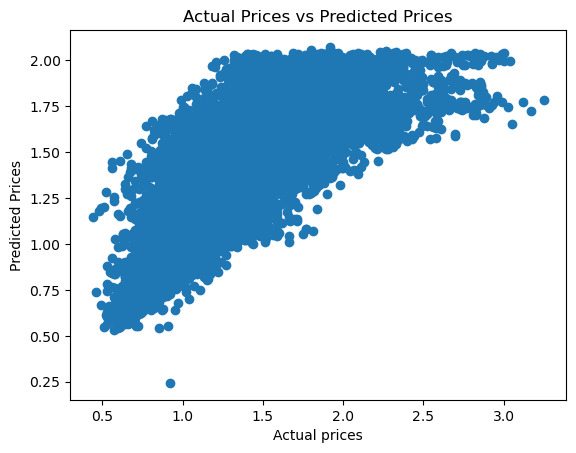

In [95]:
# plotting the graph between actual and predicted values
plt.scatter(Y_TRAIN,train_pred)
# specifying the x label as actual prices
plt.xlabel("Actual prices")
# specifying the y label as predicted prices
plt.ylabel("Predicted Prices")
# giving the title as actual vs predicted prices
plt.title("Actual Prices vs Predicted Prices")
# dsiplay the graph
plt.show()

### Evaluate perfomrance on testing data

In [97]:
# evaluate the test loss and mae
test_loss,test_mae=nn_regressor.evaluate(X_TEST,Y_TEST)
# print the test loss
print("Testing Loss : ",test_loss)
# print the test mae
print("Testing mae : ",test_mae)

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0661 - mae: 0.1936
Testing Loss :  0.06676933914422989
Testing mae :  0.19480279088020325


#### R2 score of testing data

In [99]:
# make predictions on test data
test_pred=nn_regressor.predict(X_TEST)
# calculate r2 score
r2 = r2_score(Y_TEST, test_pred)
# print r2 score
print("R-squared: ",r2)


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step
R-squared:  0.5983377405745138


#### Graph between actual and predicted test samples

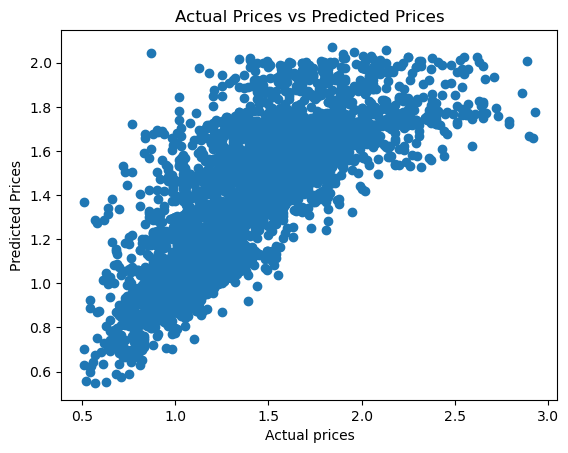

In [101]:
# plotting the graph between actual and predicted values
plt.scatter(Y_TEST, test_pred)
# specifying the x label as actual prices
plt.xlabel("Actual prices")
# specifying the y label as predicted prices
plt.ylabel("Predicted Prices")
# giving the title as actual vs predicted prices
plt.title("Actual Prices vs Predicted Prices")
# dsipplay the graph
plt.show()

<h1 style="color:green;font-family:cursive;text-align:center;font-weight:bold;"> Conclusion</h1>

<h2 style="color:red;font-family:cursive;text-align:left;font-weight:100;">Best Model:</h2>


<p style="color:blue;font-family:cursive;text-align:left;font-weight:100;">Best Model: Random Forest<br>
Training R Squared :  0.9656859197901072<br>
Training Mean Absolute Error :  0.050185046921021985<br>
Testing R Squared :  0.8017736091253951<br>
Testing Mean Absolute Error :  0.1271501369863014<br></p>

<h2 style="color:red;font-family:cursive;text-align:left;font-weight:100;">Runner-Up:</h2>

<p style="color:blue;font-family:cursive;text-align:left;font-weight:100;">Artificial Neural Network with reasonable 𝑅_Squared values and close training/testing losses suggest moderate performance, but it lags behind Random Forest in predictive power.<br></p>


<h2 style="color:red;font-family:cursive;text-align:left;font-weight:100;">Not Recommended Models:</h2>

<p style="color:blue;font-family:cursive;text-align:left;font-weight:100;">
Decision Tree (overfitting), Linear Regression, and SVR (underfitting).</p>